Fancy-pants plots for the paper.

In [49]:
data_file = './human_and_llm_annotated_data.csv'

figure_dir = '/Users/jnaiman/Dropbox/Paper_JCDL2025/figures/'

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [3]:
df = pd.read_csv(data_file)
df.head()

,annotators,image file,Human nGaussians,Human median (number),Human median (draw),Ground Truth nGaussians,Ground Truth Median,Ground Truth nBars,LLM nGaussians,LLM nGaussians FewShot,LLM nGaussians Mini,LLM Median,LLM Median FewShot,LLM Median Mini,LLM nGaussians (int),LLM nGaussians (int) FewShot,LLM nGaussians (int) Mini
0,annotator1,id_0041.jpeg,1,0.055,0.055269,1,0.054428,50,1,1,1,0.055,0.0550,0.055,1,1,1
1,annotator1,id_0014.jpeg,3,0.450,0.457472,1,0.478811,50,3,1,50,0.490,0.4700,0.480,1,1,3
2,annotator1,id_0028.jpeg,2,-0.420,-0.415863,2,-0.417302,45,3,1,30,-0.410,-0.4125,-0.402,1,1,1
3,annotator1,id_0057.jpeg,2,-0.700,-0.707283,2,-0.758364,50,2,2,2,-0.750,-0.6000,-0.600,2,2,2
4,annotator1,id_0020.jpeg,1,-0.200,-0.171428,1,-0.178007,50,1,1,25,0.000,0.0000,-0.100,1,1,1


Specific for each annotator:

In [4]:
df_a1 = df[df['annotators']=='annotator1']
df_a2 = df[df['annotators']=='annotator2']
# since we have repeats for LLMs, just pick one so we don't repeat
df_allm = df[df['annotators']=='annotator1']

## Plot with residuals

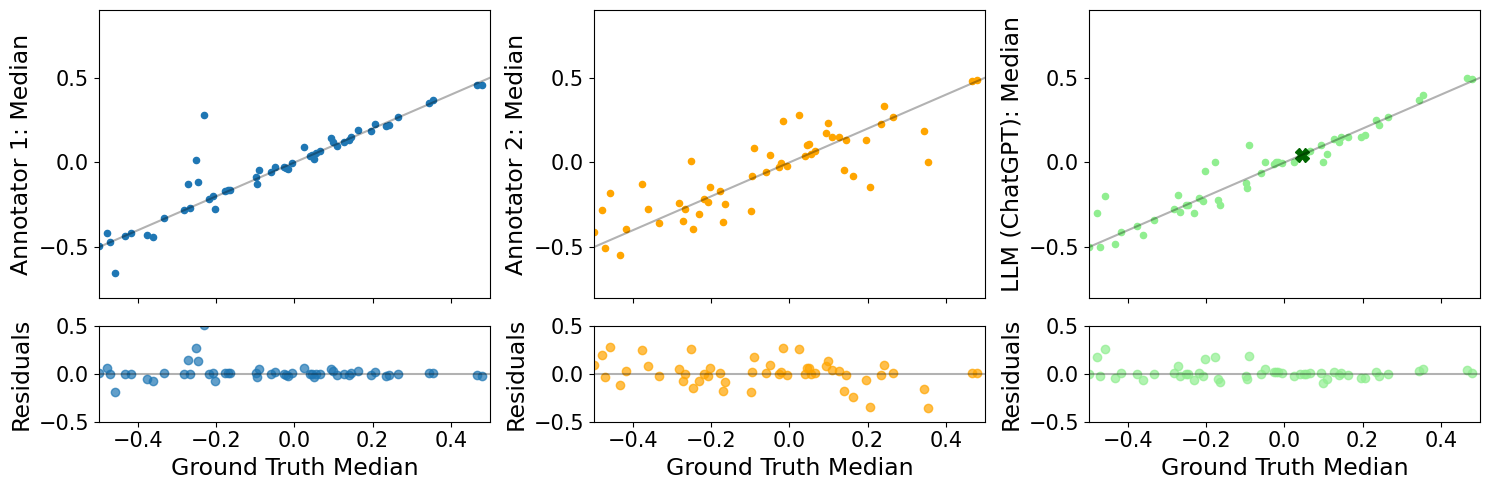

In [ ]:
llm_color = 'lightgreen'
a1_color = 'tab:blue'
a2_color = 'orange'

llm_error_color = 'darkgreen'
llm_error_marker_size = 10

equal_line_color = 'black'
equal_line_style = '-'
equal_line_alpha = 0.3

font_size_labels = 17
font_size_ticks = 15

# y-axis labels
yaxis_labels = ['Annotator 1: Median', 'Annotator 2: Median', 'LLM (ChatGPT): Median']

base = 5
# Create 2x3 subplots with shared x-axes
fig, ax = plt.subplots(2, 3, figsize=(base*3, base*1.0), 
                       gridspec_kw={'height_ratios': [3, 1]}, 
                       sharex='col')

############### ANNOTATOR 1 ###################

df_a1.plot(x='Ground Truth Median', y='Human median (draw)', kind='scatter', ax=ax[0,0], color=a1_color)

# Calculate and plot residuals for Annotator 1
residuals_a1 = df_a1['Human median (draw)'] - df_a1['Ground Truth Median']
residuals_a1 = residuals_a1.values
ax[1,0].scatter(df_a1['Ground Truth Median'], residuals_a1, color=a1_color, alpha=0.7)
ax[1,0].axhline(y=0, color=equal_line_color, linestyle=equal_line_style, alpha=equal_line_alpha)
ax[1,0].set_ylabel('Residuals', fontsize=font_size_labels)

############### ANNOTATOR 2 ###################

df_a2.plot(x='Ground Truth Median', y='Human median (draw)', kind='scatter', ax=ax[0,1], color=a2_color)

# Calculate and plot residuals for Annotator 2
residuals_a2 = df_a2['Human median (draw)'] - df_a2['Ground Truth Median']
residuals_a2 = residuals_a2.values
ax[1,1].scatter(df_a2['Ground Truth Median'], residuals_a2, color=a2_color, alpha=0.7)
ax[1,1].axhline(y=0, color=equal_line_color, linestyle=equal_line_style, alpha=equal_line_alpha)
ax[1,1].set_ylabel('Residuals', fontsize=font_size_labels)

##################### LLM #####################

df_allm.plot(x='Ground Truth Median', y='LLM Median', kind='scatter', color=llm_color, ax=ax[0,2])

# Calculate and plot residuals for LLM (excluding NaN values)
llm_residuals = []
llm_gt_values = []
for i in range(len(df_allm)):
    llmm = df_allm.iloc[i]['LLM Median']
    gtm = df_allm.iloc[i]['Ground Truth Median']
    try:
        llmm = float(llmm)
        if not np.isnan(llmm):
            llm_residuals.append(llmm - gtm)
            llm_gt_values.append(gtm)
    except:
        pass

# update
llm_residuals = np.array(llm_residuals)
ax[1,2].scatter(llm_gt_values, llm_residuals, color=llm_color, alpha=0.7)
ax[1,2].axhline(y=0, color=equal_line_color, linestyle=equal_line_style, alpha=equal_line_alpha)
ax[1,2].set_ylabel('Residuals', fontsize=font_size_labels)

# plot NaNs (only on main plot)
for i in range(len(df_allm)):
    llmm = df_allm.iloc[i]['LLM Median']
    try:
        llmm = float(llmm)
    except:
        print("FAILED:", llmm)
        llmm = np.nan
    try:
        if np.isnan(llmm):
            gtm = df_allm.iloc[i]['Ground Truth Median']
            ax[0,2].plot([gtm],[gtm], color=llm_error_color, marker='X', ms=llm_error_marker_size)
    except:
        pass

# Set limits and equal lines for main plots only
mxmin = -0.8
mxmax = 0.9
for i in range(3):  # Only for the top row (main plots)
    ax[0,i].set_ylim(mxmin, mxmax)
    ax[0,i].set_xlim(mxmin, mxmax)
    ax[0,i].plot([mxmin,mxmax], [mxmin,mxmax], color=equal_line_color, 
                 linestyle=equal_line_style, zorder=10, 
                 alpha=equal_line_alpha)
    ax[0,i].set_ylabel(yaxis_labels[i], fontsize=font_size_labels)

# also set some residual axes
mxmin = -0.5
mxmax = 0.5
for i in range(3):  # Only for the top row (main plots)
    ax[1,i].set_ylim(mxmin, mxmax)
    ax[1,i].set_xlim(mxmin, mxmax)

# Set font sizes for all axes
for i in range(2):  # Both rows
    for j in range(3):  # All columns
        # Set tick label font sizes
        ax[i,j].tick_params(axis='both', which='major', labelsize=font_size_ticks)
        
        # Set x-axis label font size (only for bottom row)
        if i == 1:
            ax[i,j].set_xlabel('Ground Truth Median', fontsize=font_size_labels)

# Adjust layout to prevent overlapping
plt.tight_layout()

fig.savefig(figure_dir + 'relation_and_residuals.pdf')

## Calculation -- normalicy of residuals

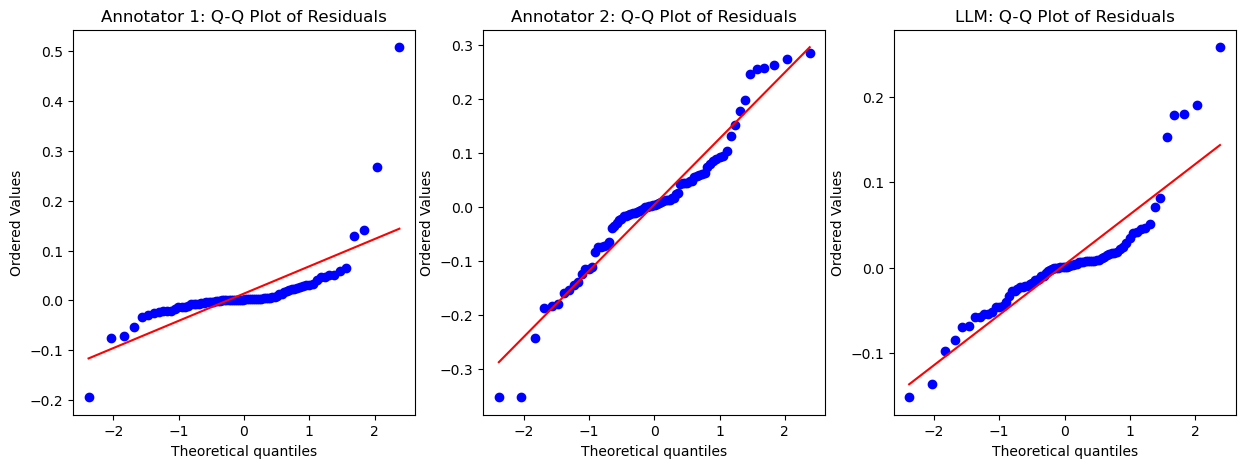

In [25]:
# Assuming 'residuals' is a list or array of your model's residuals
fig, axes = plt.subplots(1,3, figsize=(5*3,5))

for ax,res,name in zip(axes, [residuals_a1, residuals_a2, llm_residuals], ['Annotator 1', 'Annotator 2', 'LLM']):
    stats.probplot(res, dist="norm", plot=ax)
    ax.set_title(name + ": Q-Q Plot of Residuals")
    
plt.show()

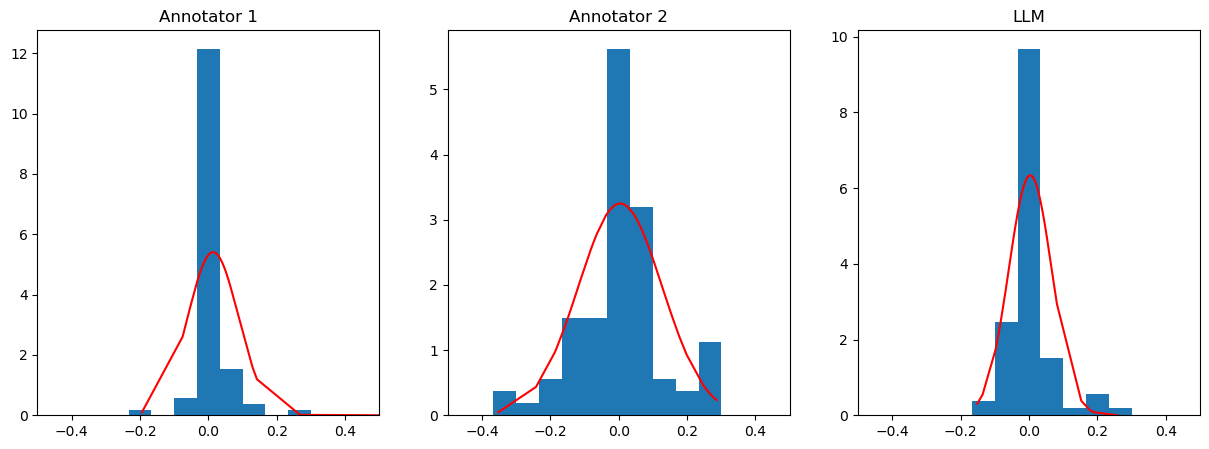

In [47]:
# plot actual distributions
fig, axes = plt.subplots(1,3, figsize=(5*3,5))
nbins = 15
mxmin = -0.5
mxmax = 0.5

bins = np.linspace(mxmin,mxmax,nbins+1)

for ax,res,name in zip(axes, [residuals_a1, residuals_a2, llm_residuals], ['Annotator 1', 'Annotator 2', 'LLM']):
    ax.hist(res,bins=bins, density=True)
    ax.set_title(name)
    # overplot normal
    hmean = np.mean(res)
    hstd = np.std(res)
    pdf = stats.norm.pdf(res, hmean, hstd)
    rsort = np.argsort(res)
    ax.plot(res[rsort], pdf[rsort], 'r-')

    ax.set_xlim(mxmin,mxmax)

plt.show()

Using the following to figure out what to say about the residuals: 
* https://www.youtube.com/watch?v=41l3AAV35zk
* https://www.datacamp.com/tutorial/qq-plot

Some "heavy tails" -- i.e. a bit more in the tails than in the middle, but also more peaked in the middle.  So an ANOVA test might be OK but maybe we also want to do something like a non-parametric, Kruskal-Wallis H-test, type test?

Let's do some actual tests for normalicy of residuals:


In [26]:
from scipy.stats import shapiro

for res,name in zip([residuals_a1, residuals_a2, llm_residuals], ['Annotator 1', 'Annotator 2', 'LLM']):
    # Assuming 'residuals' is a list or array of your model's residuals
    print('------ ' + name + ' --------')
    stat, p_value = shapiro(res)
    print(f"Shapiro-Wilk Test: Statistic={stat:.3f}, p-value={p_value:.3f}")

    if p_value > 0.05:  # Using a common significance level of 0.05
        print("Residuals are likely normally distributed (fail to reject H0)")
    else:
        print("Residuals are not normally distributed (reject H0)")

------ Annotator 1 --------
Shapiro-Wilk Test: Statistic=0.551, p-value=0.000
Residuals are not normally distributed (reject H0)
------ Annotator 2 --------
Shapiro-Wilk Test: Statistic=0.951, p-value=0.004
Residuals are not normally distributed (reject H0)
------ LLM --------
Shapiro-Wilk Test: Statistic=0.843, p-value=0.000
Residuals are not normally distributed (reject H0)


In [27]:
from scipy.stats import normaltest

for res,name in zip([residuals_a1, residuals_a2, llm_residuals], ['Annotator 1', 'Annotator 2', 'LLM']):
    print('------ ' + name + ' --------')
    # Assuming 'residuals' is a list or array of your model's residuals
    stat, p_value = normaltest(res)
    print(f"D'Agostino-Pearson Test: Statistic={stat:.3f}, p-value={p_value:.3f}")

    if p_value > 0.05:
        print("Residuals are likely normally distributed (fail to reject H0)")
    else:
        print("Residuals are not normally distributed (reject H0)")

------ Annotator 1 --------
D'Agostino-Pearson Test: Statistic=104.598, p-value=0.000
Residuals are not normally distributed (reject H0)
------ Annotator 2 --------
D'Agostino-Pearson Test: Statistic=3.877, p-value=0.144
Residuals are likely normally distributed (fail to reject H0)
------ LLM --------
D'Agostino-Pearson Test: Statistic=33.647, p-value=0.000
Residuals are not normally distributed (reject H0)


So, overall, probably definitely not normal, but based on the plots above, they are certainly normal-ish.

In [48]:
from scipy.stats import kruskal

# Perform the Kruskal-Wallis H-test
h_statistic, p_value = kruskal(residuals_a1, residuals_a2, llm_residuals)

print(f"Kruskal-Wallis H-statistic: {h_statistic:.2f}")
print(f"P-value: {p_value:.3f}")

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference between group medians.")
else:
    print("Fail to reject the null hypothesis: No significant difference found between group medians.")

Kruskal-Wallis H-statistic: 0.93
P-value: 0.628
Fail to reject the null hypothesis: No significant difference found between group medians.
